In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it

In [3]:
datasets_dense = [1485, 1515, 1475, 1468, 1489, 23512, 23517, 40981, 40982, 40983, 40984, 40701, 40685, 40900,  1111, 40498, 41161, 41162, 41163, 41164, 41165, 41166, 41167, 41168, 41169, 41142, 41143, 41144, 41145, 41146, 41150, 41156, 41157, 41158,  41159, 41138, 54, 181, 188, 1461, 1494, 1464, 12, 23, 3, 1487, 40668, 1067, 1049, 40975, 31]
#1457
datasets_sparse = [1590, 1486, 4534, 4541, 4538, 4134, 4135, 40978, 40996, 41027, 40670, 42732, 42733, 42734, 41147]
datasets = datasets_dense

In [4]:
dfResults = pd.read_csv("results_random.csv")
dfResults

,openmlid,method,time,model,performance
0,1515,lccv,653,RandomForestClassifier,0.11030
1,1515,mccv,737,RandomForestClassifier,0.11030
2,1475,lccv,831,RandomForestClassifier,0.36500
3,1475,mccv,1489,RandomForestClassifier,0.36500
4,1468,lccv,479,MLPClassifier,0.03980
5,1468,mccv,773,MLPClassifier,0.03980
6,1489,lccv,433,RandomForestClassifier,0.08210
7,1489,mccv,541,ExtraTreeClassifier,0.07990
8,23512,lccv,2564,GradientBoostingClassifier,0.29000
9,23512,mccv,3592,RandomForestClassifier,0.28280


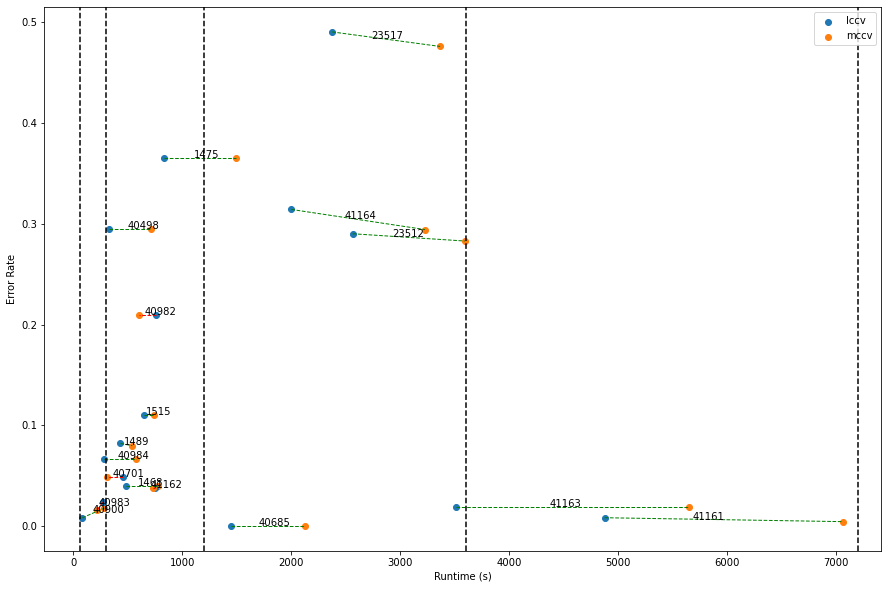

In [29]:
fig, ax = plt.subplots(figsize=(15, 10))
i = 0
for openmlid, dfds in dfResults.groupby("openmlid"):
    lccv = dfds[dfds["method"] == "lccv"].values[0]
    mccv = dfds[dfds["method"] == "mccv"].values[0]
    ax.scatter(lccv[2], lccv[4], color="C0", label="lccv" if i == 0 else None)
    ax.scatter(mccv[2], mccv[4], color="C1", label="mccv" if i == 0 else None)
    ax.plot([lccv[2], mccv[2]], [lccv[4], mccv[4]], color="green" if lccv[2] < mccv[2] else "red", linestyle="--", linewidth=1)
    ax.text((lccv[2] + mccv[2]) / 2.1, (lccv[4] + mccv[4]) / 2, openmlid)
    i += 1
ax.set_xlabel("Runtime (s)")
ax.set_ylabel("Error Rate")
ax.axvline(60, linestyle="--", color="black")
ax.axvline(300, linestyle="--", color="black")
ax.axvline(1200, linestyle="--", color="black")
ax.axvline(3600, linestyle="--", color="black")
ax.axvline(7200, linestyle="--", color="black")
#ax.set_xscale("log")
ax.legend()

In [3]:
DOMAIN_EPS = [0.0, 0.05, 0.1, 1]
DOMAIN_TIMEOUTS = [30, 60, 300]

#combos = [u[0] + ", " + u[1] for u in it.product(["$\\varepsilon$=" + str(v) for v in DOMAIN_EPS], ["t=" + str(v) for v in DOMAIN_TIMEOUTS])]
rows = []
for openmlid in sorted(datasets):
    runtimes = list(np.round(100 * (np.random.rand(5))).astype(int))
    performances = np.round((np.random.rand(5)), 2)
    performances[performances > 0.9] = np.nan
    failed_evaluations = list(np.round(10 * (np.random.rand(5))).astype(int))
    rows.append([openmlid] + [str(performances[i]) + " (" + str(runtimes[i]) + ", " + str(failed_evaluations[i]) + ")" for i in range(len(runtimes))])
columns = ["openmlid"] + ["$LCCV_{" + str(eps) + "}$" for eps in DOMAIN_EPS] + ["$10CV$"]
print(pd.DataFrame(rows, columns=columns).to_latex(index=False, escape=False))

\begin{tabular}{rlllll}
\toprule
 openmlid &   $LCCV_{0.0}$ & $LCCV_{0.05}$ &   $LCCV_{0.1}$ &     $LCCV_{1}$ &         $10CV$ \\
\midrule
        3 &    nan (89, 5) &  0.89 (70, 1) &    nan (87, 2) &    0.0 (43, 1) &     nan (5, 8) \\
       12 &  0.28 (85, 10) &  0.06 (75, 1) &   0.07 (79, 3) &    0.07 (3, 9) &   0.13 (82, 5) \\
       23 &   0.54 (92, 0) &  0.32 (28, 3) &    0.63 (1, 9) &   0.37 (15, 7) &   0.45 (49, 7) \\
       31 &   0.03 (14, 6) &  0.36 (41, 8) &   0.53 (52, 6) &   0.45 (22, 6) &   0.09 (75, 6) \\
       54 &   0.3 (27, 10) &  0.64 (92, 7) &   0.15 (33, 9) &    0.42 (2, 7) &   0.17 (55, 5) \\
      181 &   0.89 (51, 9) &  0.45 (17, 9) &   0.67 (32, 3) &     0.3 (4, 4) &   0.26 (19, 9) \\
      188 &   0.67 (10, 4) &   0.27 (3, 9) &   0.45 (29, 5) &   0.02 (43, 6) &   0.39 (16, 8) \\
     1049 &   0.42 (81, 6) &  0.31 (69, 5) &   0.46 (56, 6) &    0.45 (3, 3) &    nan (62, 6) \\
     1067 &    0.3 (80, 4) &  0.45 (64, 5) &   0.26 (89, 6) &     nan (2, 5) &   0.58